In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [89]:
df =  pd.read_csv("C:/Users/18574/Downloads/car_insurance.csv")
df.head(3)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,10238,11000.0,sedan,0,0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   MARRIED              10000 non-null  int64  
 9   CHILDREN             10000 non-null  int64  
 10  POSTAL_CODE          10000 non-null  int64  
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [91]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col,':',df[col].isna().sum())

CREDIT_SCORE : 982
ANNUAL_MILEAGE : 957


In [92]:
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean())
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mode()[0])

In [93]:
df.drop(columns = 'ID',inplace = True)

In [94]:
le =  LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[[col]])

C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [95]:
df

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,2,0.629027,1,0,1,10238,12000.0,0,0,0,0,0
1,0,1,0,1,1,0.357757,0,0,0,10238,16000.0,0,0,0,0,1
2,0,0,0,0,3,0.493146,1,0,0,10238,11000.0,0,0,0,0,0
3,0,1,0,2,3,0.206013,1,0,1,32765,11000.0,0,0,0,0,0
4,1,1,1,1,3,0.388366,1,0,0,32765,12000.0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,2,2,0.582787,1,0,0,10238,16000.0,0,0,0,1,0
9996,1,0,1,1,0,0.522231,1,0,1,32765,11000.0,0,1,0,0,0
9997,1,1,0,0,0,0.470940,1,0,1,10238,14000.0,0,0,0,0,0
9998,1,0,1,0,1,0.364185,0,0,1,10238,13000.0,0,2,0,1,1


<Axes: >

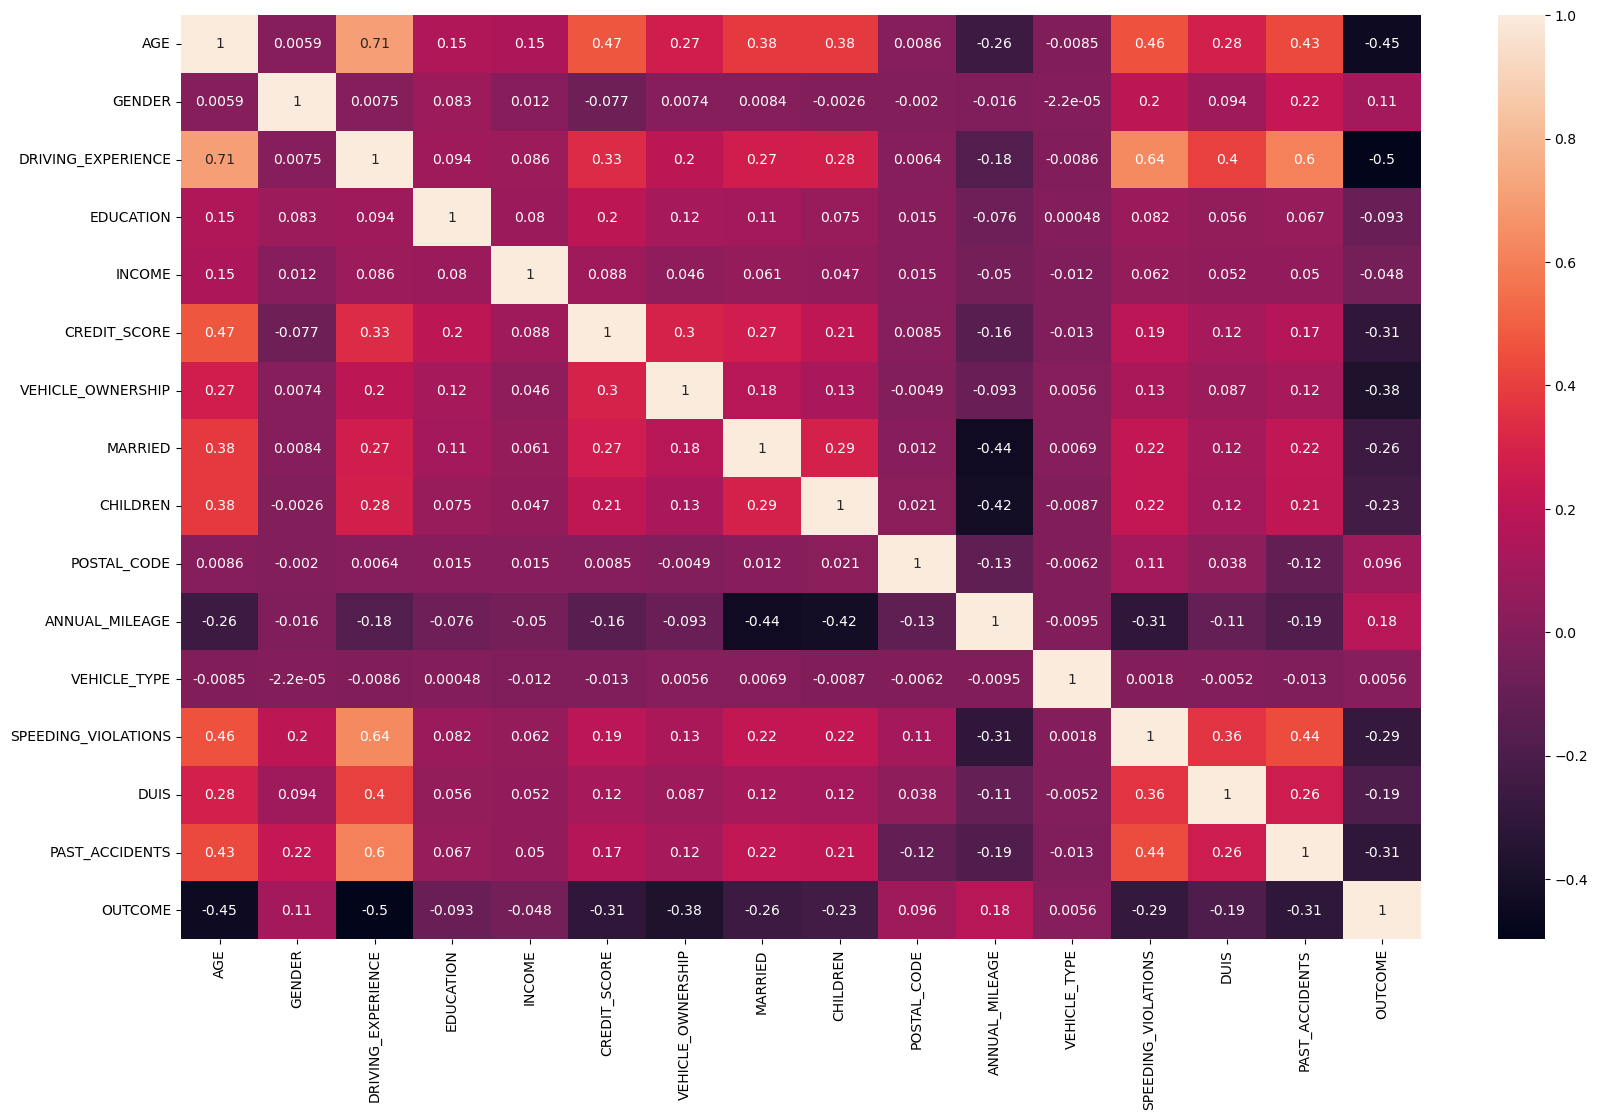

In [96]:
plt.figure(figsize= (20,12))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [97]:
X = df.drop(['OUTCOME'],axis = 1)
y = df['OUTCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients of the significant variables
significant_variables = X.columns[(model.coef_ > 0.05).ravel()]  # Adjust the threshold as needed

# Calculate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print the coefficients of the significant variables and accuracy
print("Significant Variables and Their Coefficients:")
for var in significant_variables:
    coef_index = X.columns.get_loc(var)
    coef_value = model.coef_[0][coef_index]
    print(f"{var}: {coef_value:.2f}")
print()
coefficients = model.coef_.ravel()
feature_names = X.columns

# List out the coefficients of each variable
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Model Accuracy: 0.79
Significant Variables and Their Coefficients:

AGE: -0.31
GENDER: 0.01
DRIVING_EXPERIENCE: -0.31
EDUCATION: -0.08
INCOME: -0.08
CREDIT_SCORE: -0.04
VEHICLE_OWNERSHIP: -0.12
MARRIED: -0.10
CHILDREN: -0.09
POSTAL_CODE: 0.00
ANNUAL_MILEAGE: 0.00
VEHICLE_TYPE: -0.00
SPEEDING_VIOLATIONS: -0.44
DUIS: -0.07
PAST_ACCIDENTS: -0.33


Model Accuracy Results:
Random Forest: Accuracy = 0.80
Decision Tree: Accuracy = 0.77
Gradient Boosting: Accuracy = 0.81
Neural Network: Accuracy = 0.70
The most accurate model is: Gradient Boosting

Random Forest
[[1213  154]
 [ 244  389]]



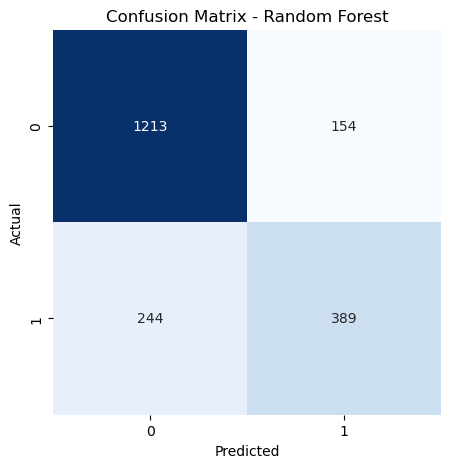


Decision Tree
[[1139  228]
 [ 247  386]]



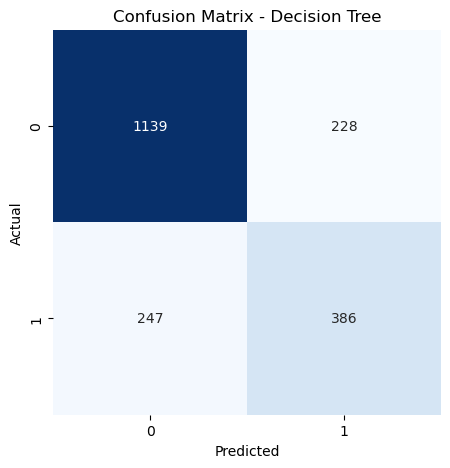


Gradient Boosting
[[1199  168]
 [ 209  424]]



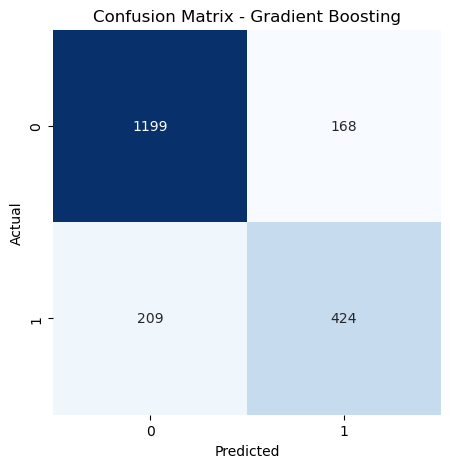


Neural Network
[[415 952]
 [  8 625]]



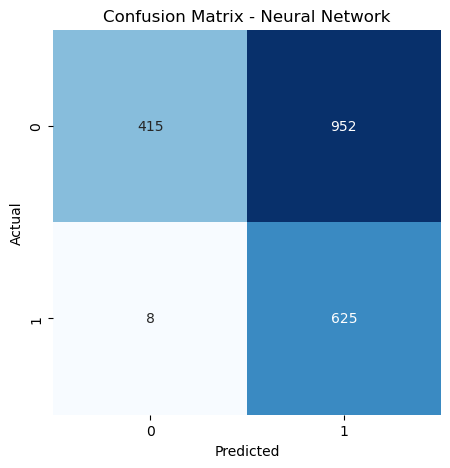

In [81]:
# Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=1000),
    "Neural Network": MLPClassifier(max_iter=1000)
}


results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Find the most accurate model
best_model = max(results, key=results.get)
print("Model Accuracy Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

print(f"The most accurate model is: {best_model}")

# Confusion matrices for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print()
    print(model_name)
    print(cm)
    print()
    # Plot the confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()